# Data Analysis Exercice  - Réalisé par : Massyl ADJAL le 09/07/2024 à Paris

### Problème : Étude de cas - Data Science
  
Vous avez à votre disposition un jeu de données qui contient des identifiants anonymisés de 4 centres commerciaux français ainsi que des identifiants de téléphones dont les propriétaires ont visité ces centres commerciaux avec la date et l'heure des différents pings observés au cours de la visite.  
  
L'objectif de l'étude est, à partir de ces données, de déterminer les horaires d'ouverture de chacun des centres pour chaque jour de la semaine.  
  
Idéalement vous proposerez un algorithme qui permettra de déterminer les horaires d'ouverture d'un centre ne faisant pas partie de ce dataset à partir de ses données de fréquentation.  
  
N'hésitez pas à proposer également toute piste d'amélioration sur la qualité des données source que vous jugerez pertinente.  
  
Vous présenterez vos résultats sous la forme d'un notebook avec vos calculs éventuellement accompagné d'un powerpoint pour présenter les différents résultats.  

### Importing libraries :

In [289]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

The data is included in a csv file, so we use pandas library to read it as a pandas Dataframe using the **read_csv()** function :

In [290]:
dataframe = pd.read_csv('at_home_test_data_study_centers.csv')

### First look at the data :
The pandas dataframe is an object, we can use the **head()** method to get an overview of the first couple of values of our dataframe, and the **info()** method to get some general informations about it :

In [291]:
dataframe

,shopping_center_id,device_local_date,device_hash_id
0,b43e9e4f-acd1-4941-874d-e0c5650ab91e,2019-09-14 10:00:25,6fdffac307
1,b43e9e4f-acd1-4941-874d-e0c5650ab91e,2019-09-14 17:13:15,386141ebd8
2,b43e9e4f-acd1-4941-874d-e0c5650ab91e,2019-09-14 9:07:06,b06242b848
3,b43e9e4f-acd1-4941-874d-e0c5650ab91e,2019-09-14 17:14:49,c13cc52e82
4,599cb959-11ef-49aa-9eb3-e6c17b4ea6ba,2019-09-14 10:17:35,f339ddf999
...,...,...,...
81833,599cb959-11ef-49aa-9eb3-e6c17b4ea6ba,2019-09-04 18:05:48,b3917d13d5
81834,cb2d5bb6-c372-4a51-8231-4ffa288a0c28,2019-09-04 18:46:00,fa4acee13c
81835,599cb959-11ef-49aa-9eb3-e6c17b4ea6ba,2019-09-04 14:12:18,dbdee4cd27
81836,b43e9e4f-acd1-4941-874d-e0c5650ab91e,2019-09-04 15:30:48,32c7aecabc


In [292]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81838 entries, 0 to 81837
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   shopping_center_id  81838 non-null  object
 1   device_local_date   81838 non-null  object
 2   device_hash_id      81838 non-null  object
dtypes: object(3)
memory usage: 1.9+ MB


We observe that we have **3 columns** : **shop_center_id**, **device_local_date** and **device_hash_id**, and **81838 rows** which are our samples which correspond to different phone pings.

we verify if there are missing data :

In [293]:
dataframe.isnull().sum()

shopping_center_id    0
device_local_date     0
device_hash_id        0
dtype: int64

### Processing the date-time collumn :
we can convert the collumn into datetime format for easier manipulation :

In [294]:
dataframe['device_local_date']=pd.to_datetime(dataframe['device_local_date'])
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81838 entries, 0 to 81837
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   shopping_center_id  81838 non-null  object        
 1   device_local_date   81838 non-null  datetime64[ns]
 2   device_hash_id      81838 non-null  object        
dtypes: datetime64[ns](1), object(2)
memory usage: 1.9+ MB


we must verify that the data is collected across one time period (either summer or winter time), we can do that by looking at the earliest and latest date :  
We can see that the data is collected across a 17-day period from the $1^{st}$ to the $17^{th}$ of September 2019

In [295]:
print('The earliest date is : ',dataframe['device_local_date'].min())
print('The latest date is : ',dataframe['device_local_date'].max())

The earliest date is :  2019-09-01 00:19:53
The latest date is :  2019-09-17 23:59:59


We create a new dictionary variable to distinguish weekdays :

In [296]:
weekdays = {0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'}
weekdays

{0: 'Monday',
 1: 'Tuesday',
 2: 'Wednesday',
 3: 'Thursday',
 4: 'Friday',
 5: 'Saturday',
 6: 'Sunday'}

We add the collumn of weekdays : $1^{st}$ september 2019 was a Sunday, $14^{st}$ september 2019 was a Saturday

In [297]:
dataframe['Weekday'] = ((dataframe['device_local_date'].dt.weekday)).map(weekdays)
dataframe.head()

,shopping_center_id,device_local_date,device_hash_id,Weekday
0,b43e9e4f-acd1-4941-874d-e0c5650ab91e,2019-09-14 10:00:25,6fdffac307,Saturday
1,b43e9e4f-acd1-4941-874d-e0c5650ab91e,2019-09-14 17:13:15,386141ebd8,Saturday
2,b43e9e4f-acd1-4941-874d-e0c5650ab91e,2019-09-14 09:07:06,b06242b848,Saturday
3,b43e9e4f-acd1-4941-874d-e0c5650ab91e,2019-09-14 17:14:49,c13cc52e82,Saturday
4,599cb959-11ef-49aa-9eb3-e6c17b4ea6ba,2019-09-14 10:17:35,f339ddf999,Saturday


We add a collumn of the Hour :

In [298]:
dataframe['Hour'] = (dataframe['device_local_date'].dt.hour)
dataframe.head()

,shopping_center_id,device_local_date,device_hash_id,Weekday,Hour
0,b43e9e4f-acd1-4941-874d-e0c5650ab91e,2019-09-14 10:00:25,6fdffac307,Saturday,10
1,b43e9e4f-acd1-4941-874d-e0c5650ab91e,2019-09-14 17:13:15,386141ebd8,Saturday,17
2,b43e9e4f-acd1-4941-874d-e0c5650ab91e,2019-09-14 09:07:06,b06242b848,Saturday,9
3,b43e9e4f-acd1-4941-874d-e0c5650ab91e,2019-09-14 17:14:49,c13cc52e82,Saturday,17
4,599cb959-11ef-49aa-9eb3-e6c17b4ea6ba,2019-09-14 10:17:35,f339ddf999,Saturday,10


We add a collumn of the Date :

In [299]:
dataframe['Date'] = (dataframe['device_local_date'].dt.date)
dataframe.head()

,shopping_center_id,device_local_date,device_hash_id,Weekday,Hour,Date
0,b43e9e4f-acd1-4941-874d-e0c5650ab91e,2019-09-14 10:00:25,6fdffac307,Saturday,10,2019-09-14
1,b43e9e4f-acd1-4941-874d-e0c5650ab91e,2019-09-14 17:13:15,386141ebd8,Saturday,17,2019-09-14
2,b43e9e4f-acd1-4941-874d-e0c5650ab91e,2019-09-14 09:07:06,b06242b848,Saturday,9,2019-09-14
3,b43e9e4f-acd1-4941-874d-e0c5650ab91e,2019-09-14 17:14:49,c13cc52e82,Saturday,17,2019-09-14
4,599cb959-11ef-49aa-9eb3-e6c17b4ea6ba,2019-09-14 10:17:35,f339ddf999,Saturday,10,2019-09-14


### Separating the data of each shopping center :

We start by retrieving the id of our shopping centers :

In [300]:
shoppingCenter_IDs=dataframe['shopping_center_id'].unique()
shoppingCenter_IDs

array(['b43e9e4f-acd1-4941-874d-e0c5650ab91e',
       '599cb959-11ef-49aa-9eb3-e6c17b4ea6ba',
       '0cd35523-1eca-4f09-ab0d-0b506ae9d986',
       'cb2d5bb6-c372-4a51-8231-4ffa288a0c28'], dtype=object)

As expected we have a numpy array containing 4 strings which are the 4 different shop id's.

In [301]:
Aframe = dataframe[dataframe['shopping_center_id']==shoppingCenter_IDs[0]]
Bframe = dataframe[dataframe['shopping_center_id']==shoppingCenter_IDs[1]]
Cframe = dataframe[dataframe['shopping_center_id']==shoppingCenter_IDs[2]]
Dframe = dataframe[dataframe['shopping_center_id']==shoppingCenter_IDs[3]]

In [302]:
Dframe.head()

,shopping_center_id,device_local_date,device_hash_id,Weekday,Hour,Date
12,cb2d5bb6-c372-4a51-8231-4ffa288a0c28,2019-09-13 19:06:40,21a1e6216b,Friday,19,2019-09-13
17,cb2d5bb6-c372-4a51-8231-4ffa288a0c28,2019-09-15 11:54:38,02e5908138,Sunday,11,2019-09-15
21,cb2d5bb6-c372-4a51-8231-4ffa288a0c28,2019-09-15 15:20:41,72522c870e,Sunday,15,2019-09-15
32,cb2d5bb6-c372-4a51-8231-4ffa288a0c28,2019-09-02 20:19:34,48a1ee30d9,Monday,20,2019-09-02
33,cb2d5bb6-c372-4a51-8231-4ffa288a0c28,2019-09-15 08:29:35,48a1ee30d9,Sunday,8,2019-09-15


### Data representation :

We use this line of code to determine the amount of distinct device_ids throughout a specific hour :

In [303]:
Aframe[(Aframe['Weekday']=='Monday') & (Aframe['device_local_date'].dt.hour==7)]['device_hash_id'].value_counts()

device_hash_id
a1cb49c576    35
10e9e220c3    17
292b2a3f93     4
58064a5a21     3
8a25e682d7     2
732c7b583f     2
c9b93ec646     1
a51636b52a     1
dbdb9ccc0f     1
8cca6036ea     1
Name: count, dtype: int64

We use this line of code to determine the number of distinct days for a specific weekday in the dataset :

In [304]:
Aframe[(Aframe['Weekday']=='Sunday')]['device_local_date'].dt.date.unique()

array([datetime.date(2019, 9, 15), datetime.date(2019, 9, 1),
       datetime.date(2019, 9, 8)], dtype=object)

We create a function that gives us the average number of devices pinged in a certain hour :

In [305]:
def PersonPerHourCount(df_shoppingcenter,Weekday):
    """
        df_shoppingcenter : dataframe containing the following collumns : 'device_hash_id','device_local_date','Weekday'
        Weekday : string (example : 'Saturday')

        output : 24 lengh vector containing the amount of unique devices pinged throughout the day. exemple : index 15 represents [15h-16h[
    """
    personperhour = np.zeros(24)
    for i in range(24):
        personperhour[i] = len(df_shoppingcenter[(df_shoppingcenter['Weekday']==Weekday) & (df_shoppingcenter['device_local_date'].dt.hour==i)]['device_hash_id'].unique())
        personperhour[i] = personperhour[i] / (len(Aframe[(Aframe['Weekday']==Weekday)]['device_local_date'].dt.date.unique()))  #for averaging depending on the amount of days
    return personperhour

We test the function :

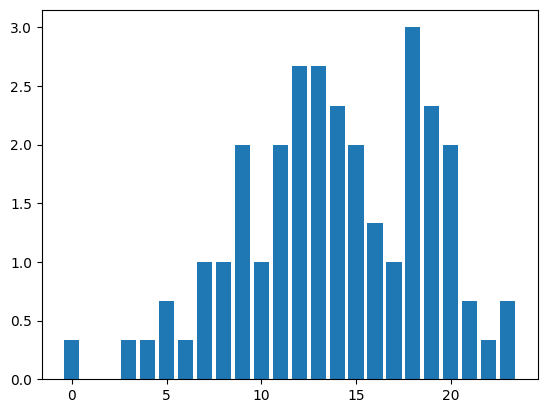

In [306]:
personcount_centerA_monday = PersonPerHourCount(Aframe,'Sunday')

plt.figure()
plt.bar(range(24),personcount_centerA_monday)
plt.show()

Now we plot the results of each shopping center for each weekday :

We start by calculating the number of unique devices pinged of each shopping center and asigning it to a matrix where the collumns represent the weekdays and the rows the hour :

In [307]:
personcount_centerA = np.zeros((7,24))
for i in range(7):
    personcount_centerA[i,:] = PersonPerHourCount(Aframe,weekdays[i])

personcount_centerB = np.zeros((7,24))
for i in range(7):
    personcount_centerB[i,:] = PersonPerHourCount(Bframe,weekdays[i])

personcount_centerC = np.zeros((7,24))
for i in range(7):
    personcount_centerC[i,:] = PersonPerHourCount(Cframe,weekdays[i])

personcount_centerD = np.zeros((7,24))
for i in range(7):
    personcount_centerD[i,:] = PersonPerHourCount(Dframe,weekdays[i])

personcount_centerA

array([[ 0.33333333,  0.        ,  0.        ,  0.66666667,  0.33333333,
         0.66666667,  1.        ,  3.33333333,  7.        , 11.66666667,
        12.66666667, 13.66666667, 17.        , 12.33333333, 12.33333333,
        12.66666667, 15.66666667, 16.33333333, 16.33333333,  9.66666667,
         5.66666667,  3.        ,  1.33333333,  0.        ],
       [ 0.33333333,  0.        ,  0.        ,  0.33333333,  0.33333333,
         1.33333333,  2.        ,  2.66666667,  5.66666667,  7.66666667,
         8.33333333, 11.        , 16.33333333, 13.33333333, 10.66666667,
         9.        , 14.66666667, 14.66666667, 16.33333333,  9.        ,
         4.66666667,  2.66666667,  0.66666667,  0.33333333],
       [ 0.5       ,  0.        ,  0.        ,  0.5       ,  1.        ,
         0.5       ,  0.5       ,  1.        ,  4.        ,  7.        ,
        10.        , 15.        , 13.5       , 10.5       ,  9.5       ,
        17.5       , 18.        , 11.        , 14.5       , 13.5       ,
  

We then plot the results of each shopping center using imshow...

### Determining shopping centers opening hours : 
#### Shoping center A :

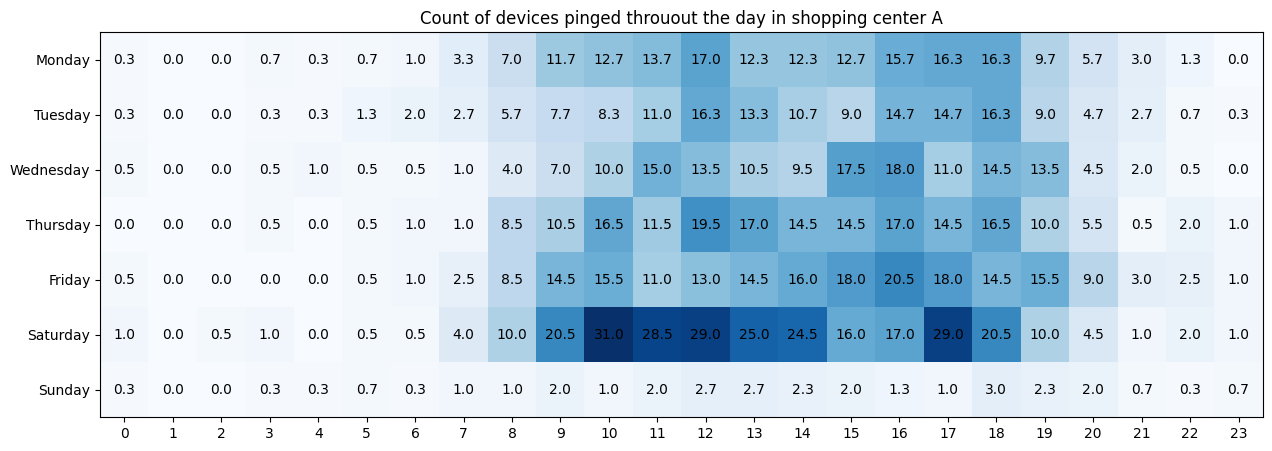

In [308]:
# Shopping center A
plt.figure(figsize=(15,5))
plt.title('Count of devices pinged throuout the day in shopping center A')
plt.yticks(range(7), list(weekdays.values()))
plt.xticks(range(24), range(24))
plt.imshow(personcount_centerA,aspect='auto',cmap='Blues')
for i in range(7):
    for j in range(24):
        plt.text(j, i, f'{personcount_centerA[i,j]:.1f}', color='k',ha='center', va='center')

**Monday** - **Saturday** : From **8h** to **21h**  
**Sunday** : **Closed**  

#### Shoping center B :

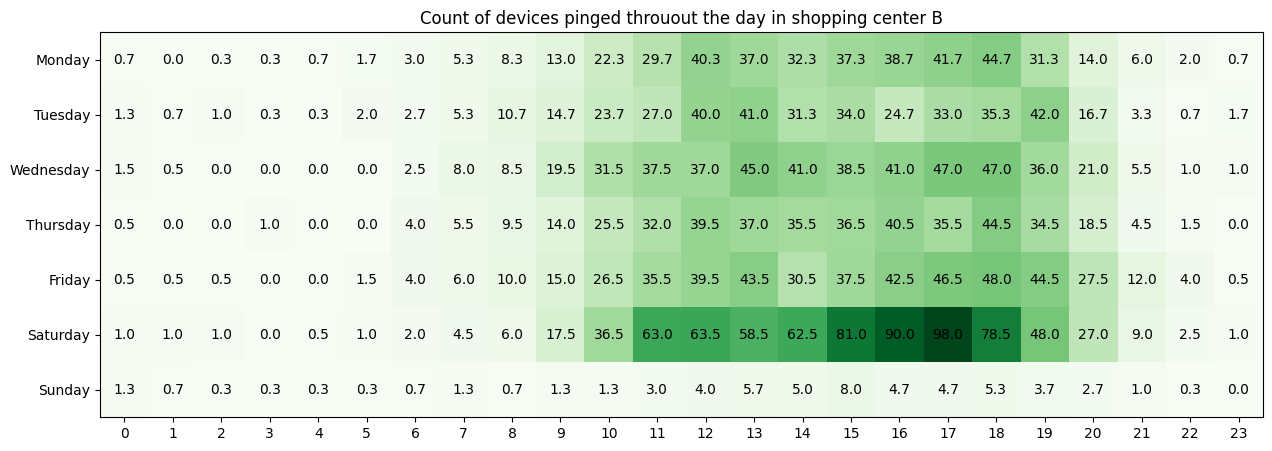

In [309]:
# Shopping center B
plt.figure(figsize=(15,5))
plt.title('Count of devices pinged throuout the day in shopping center B')
plt.yticks(range(7), list(weekdays.values()))
plt.xticks(range(24), range(24))
plt.imshow(personcount_centerB,aspect='auto',cmap='Greens')
for i in range(7):
    for j in range(24):
        plt.text(j, i, f'{personcount_centerB[i,j]:.1f}', color='k',ha='center', va='center')

**Monday** - **Saturday** : From **9h** to **21h**  
**Sunday** : **Closed**  

#### Shoping center C :

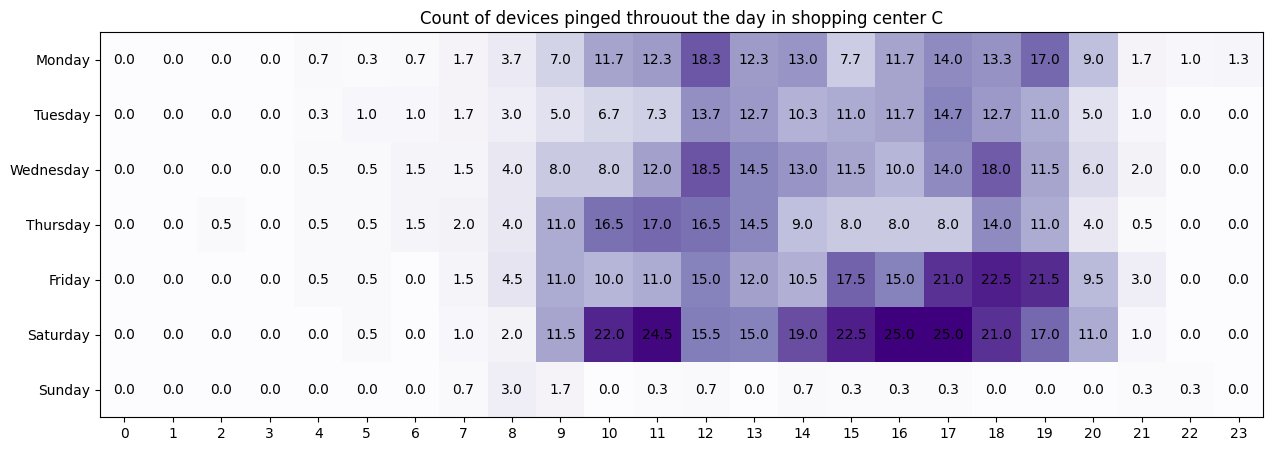

In [310]:
# Shopping center C
plt.figure(figsize=(15,5))
plt.title('Count of devices pinged throuout the day in shopping center C')
plt.yticks(range(7), list(weekdays.values()))
plt.xticks(range(24), range(24))
plt.imshow(personcount_centerC,aspect='auto',cmap='Purples')
for i in range(7):
    for j in range(24):
        plt.text(j, i, f'{personcount_centerC[i,j]:.1f}', color='k',ha='center', va='center')

**Monday** - **Saturday** : From **9h** to **21h**  
**Sunday** : **Closed**  

#### Shoping center D :

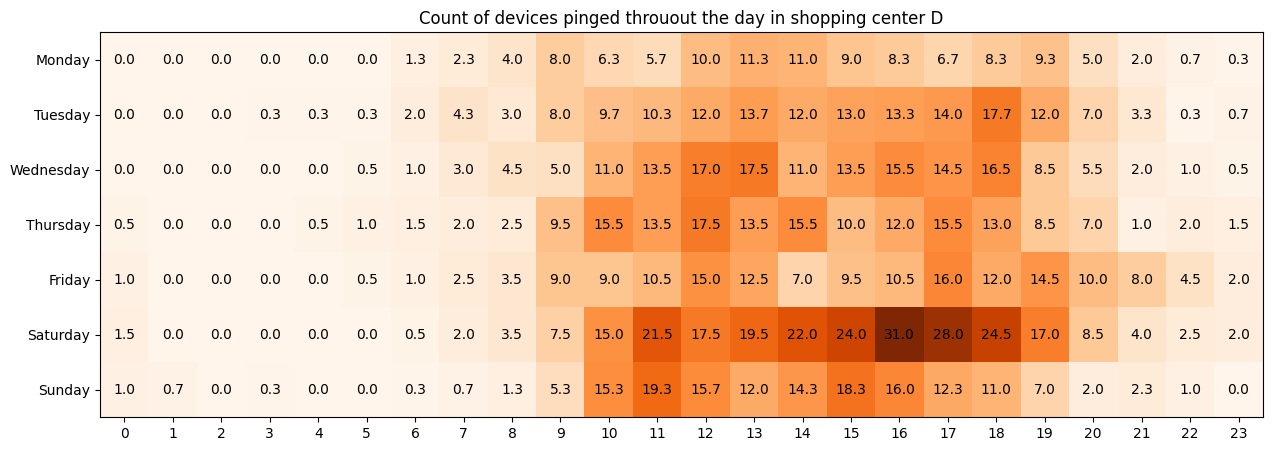

In [311]:
# Shopping center D
plt.figure(figsize=(15,5))
plt.title('Count of devices pinged throuout the day in shopping center D')
plt.yticks(range(7), list(weekdays.values()))
plt.xticks(range(24), range(24))
plt.imshow(personcount_centerD,aspect='auto',cmap='Oranges')
for i in range(7):
    for j in range(24):
        plt.text(j, i, f'{personcount_centerD[i,j]:.1f}', color='k',ha='center', va='center')

**Monday** - **Thursday** : From **9h** to **21h**  
**Friday** : From **9h** to **22h**  
**Saturday** : From **9h** to **21h**  
**Sunday** : From **9h** to **20h**  

### Attempting to filter out the workers (staff and security) :

In [312]:
# we start by using the function nunique() for obtaining the number of hours a device was detected in for every device for each day :
ConsecutiveHours_centerA = Aframe.groupby(by=['device_hash_id','Date','Weekday'])["Hour"].nunique()
ConsecutiveHours_centerA = ConsecutiveHours_centerA.sort_index(level=["Date"])

# we reset the index 
ConsecutiveHours_centerA = ConsecutiveHours_centerA.reset_index()
ConsecutiveHours_centerA.head()

,device_hash_id,Date,Weekday,Hour
0,0812e936d5,2019-09-01,Sunday,3
1,10e9e220c3,2019-09-01,Sunday,10
2,12f5d12558,2019-09-01,Sunday,1
3,37839f15ed,2019-09-01,Sunday,1
4,37c24068f1,2019-09-01,Sunday,1


In [313]:
# we can then assume the workes are those who are present more than 5 hours a day :
ConsecutiveHours_centerA = ConsecutiveHours_centerA[ConsecutiveHours_centerA['Hour']>5]
ConsecutiveHours_centerA.head()

,device_hash_id,Date,Weekday,Hour
1,10e9e220c3,2019-09-01,Sunday,10
29,10e9e220c3,2019-09-02,Monday,10
37,28c2e0917f,2019-09-02,Monday,6
54,59b9242911,2019-09-02,Monday,8
80,a1cb49c576,2019-09-02,Monday,9


In [314]:
# we can now filter the dataframe by removing all the pings that came from our supposed workers :
workers_centerA = ConsecutiveHours_centerA['device_hash_id']
Aframe_filtered = Aframe[~Aframe['device_hash_id'].isin(workers_centerA)]
Aframe_filtered.head()

,shopping_center_id,device_local_date,device_hash_id,Weekday,Hour,Date
0,b43e9e4f-acd1-4941-874d-e0c5650ab91e,2019-09-14 10:00:25,6fdffac307,Saturday,10,2019-09-14
1,b43e9e4f-acd1-4941-874d-e0c5650ab91e,2019-09-14 17:13:15,386141ebd8,Saturday,17,2019-09-14
2,b43e9e4f-acd1-4941-874d-e0c5650ab91e,2019-09-14 09:07:06,b06242b848,Saturday,9,2019-09-14
3,b43e9e4f-acd1-4941-874d-e0c5650ab91e,2019-09-14 17:14:49,c13cc52e82,Saturday,17,2019-09-14
6,b43e9e4f-acd1-4941-874d-e0c5650ab91e,2019-09-14 17:39:23,d500fae368,Saturday,17,2019-09-14


Comparing the results : 

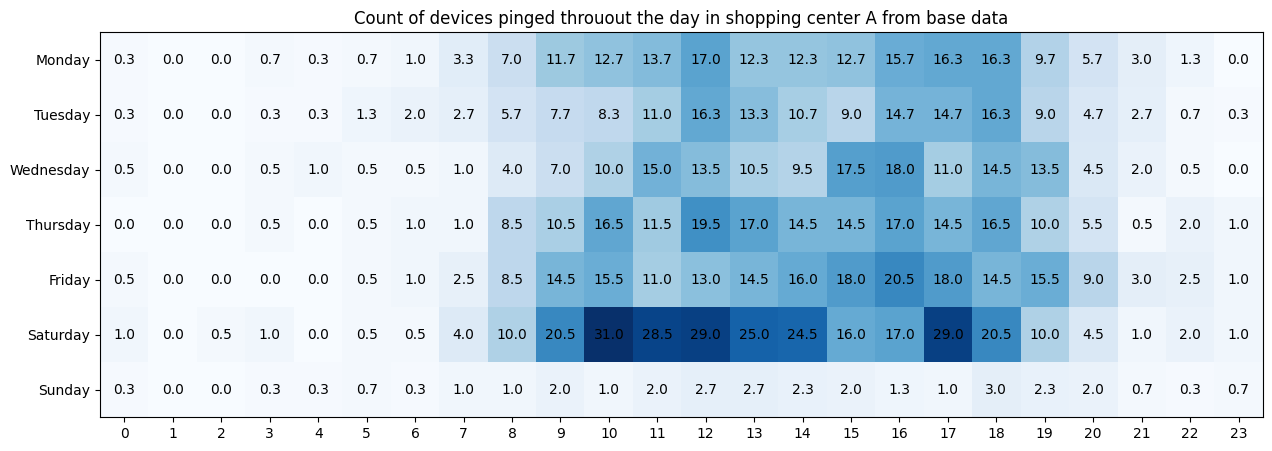

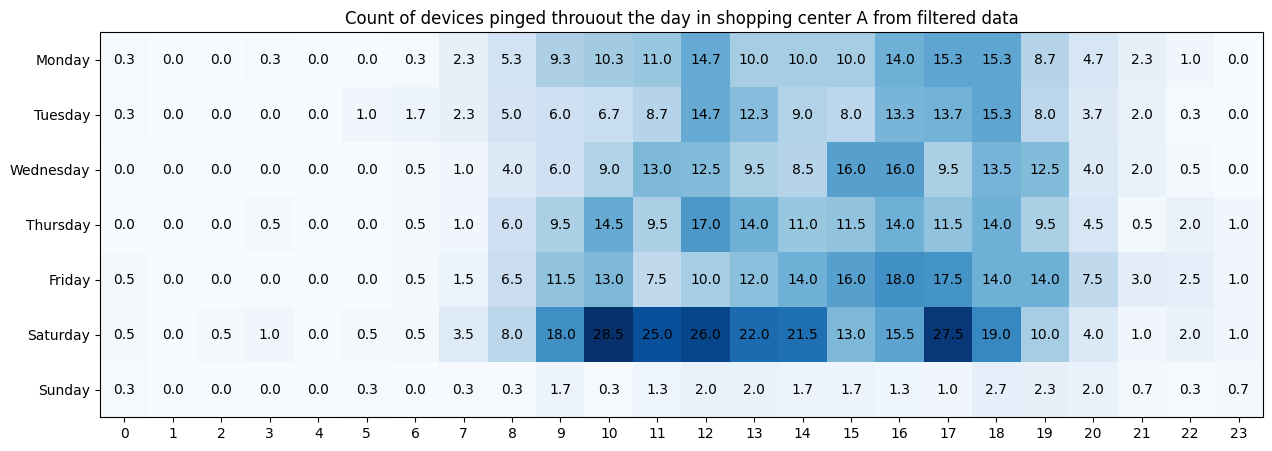

In [315]:
# Unfiltered results :
personcount_centerA = np.zeros((7,24))
for i in range(7):
    personcount_centerA[i,:] = PersonPerHourCount(Aframe,weekdays[i])
# plot :
plt.figure(figsize=(15,5))
plt.title('Count of devices pinged throuout the day in shopping center A from base data')
plt.yticks(range(7), list(weekdays.values()))
plt.xticks(range(24), range(24))
plt.imshow(personcount_centerA,aspect='auto',cmap='Blues')
for i in range(7):
    for j in range(24):
        plt.text(j, i, f'{personcount_centerA[i,j]:.1f}', color='k',ha='center', va='center')

# Filtered results :
personcount_centerA = np.zeros((7,24))
for i in range(7):
    personcount_centerA[i,:] = PersonPerHourCount(Aframe_filtered,weekdays[i])
# plot :
plt.figure(figsize=(15,5))
plt.title('Count of devices pinged throuout the day in shopping center A from filtered data')
plt.yticks(range(7), list(weekdays.values()))
plt.xticks(range(24), range(24))
plt.imshow(personcount_centerA,aspect='auto',cmap='Blues')
for i in range(7):
    for j in range(24):
        plt.text(j, i, f'{personcount_centerA[i,j]:.1f}', color='k',ha='center', va='center')

Conclusion : 
This method was ineffective in making relevant changes to the output.

### Automating the process :

We can start by looking at the mean and the standart deviation of the number of devices : 

In [316]:
# Shopping center A
print('= = = Shopping center A = = =')
GlobalMean_centerA = np.mean(personcount_centerA)
print('Overall Mean : ',GlobalMean_centerA)
std_centerA = np.zeros(7)
for i in range (7):
    std_centerA[i] = np.std(personcount_centerA[i,:])
    print(f'standart variance of {weekdays[i]} : {std_centerA[i]:.2f}')
print('\n')

# Shopping center B
print('= = = Shopping center B = = =')
GlobalMean_centerB = np.mean(personcount_centerB)
print('Overall Mean : ',GlobalMean_centerB)
std_centerB = np.zeros(7)
for i in range (7):
    std_centerB[i] = np.std(personcount_centerB[i,:])
    print(f'standart variance of {weekdays[i]} : {std_centerB[i]:.2f}')
print('\n')

# Shopping center C
print('= = = Shopping center C = = =')
GlobalMean_centerC = np.mean(personcount_centerC)
print('Overall Mean : ',GlobalMean_centerC)
std_centerC = np.zeros(7)
for i in range (7):
    std_centerC[i] = np.std(personcount_centerC[i,:])
    print(f'standart variance of {weekdays[i]} : {std_centerC[i]:.2f}')
print('\n')

# Shopping center D
print('= = = Shopping center D = = =')
GlobalMean_centerD = np.mean(personcount_centerD)
print('Overall Mean : ',GlobalMean_centerD)
std_centerD = np.zeros(7)
for i in range (7):
    std_centerD[i] = np.std(personcount_centerD[i,:])
    print(f'standart variance of {weekdays[i]} : {std_centerD[i]:.2f}')
print('\n')

= = = Shopping center A = = =
Overall Mean :  6.007936507936508
standart variance of Monday : 5.60
standart variance of Tuesday : 5.23
standart variance of Wednesday : 5.74
standart variance of Thursday : 5.93
standart variance of Friday : 6.40
standart variance of Saturday : 10.28
standart variance of Sunday : 0.84


= = = Shopping center B = = =
Overall Mean :  17.749007936507933
standart variance of Monday : 16.44
standart variance of Tuesday : 15.32
standart variance of Wednesday : 18.40
standart variance of Thursday : 16.60
standart variance of Friday : 18.07
standart variance of Saturday : 33.49
standart variance of Sunday : 2.19


= = = Shopping center C = = =
Overall Mean :  6.063492063492063
standart variance of Monday : 6.16
standart variance of Tuesday : 5.28
standart variance of Wednesday : 6.25
standart variance of Thursday : 6.10
standart variance of Friday : 7.73
standart variance of Saturday : 9.97
standart variance of Sunday : 0.67


= = = Shopping center D = = =
Overa

Observation :  
 - to determine the closed days we can choose the threshold as half the overall mean.
 - We can then determine the opening and closing hours by calculating a threshold using the mean of the open days only.

In [317]:
# OpenDays_centerA : a list containing the weekdays when the center is open, example : if it is open Sunday then the list will contain the value 6
OpenDays_centerA = []  

# determining the open days of the week and adding them to the list OpenDays_centerA :
for i in range (7):   
    if std_centerA[i]>(GlobalMean_centerA/2):
        OpenDays_centerA.append(i)

# calculating the mean device count for each day :
for i in OpenDays_centerA: 
    LocalMean_centerA = np.mean(personcount_centerA[i,:])
    print(f'Local mean of {weekdays[i]} is : {LocalMean_centerA:.2f}')

Local mean of Monday is : 6.06
Local mean of Tuesday is : 5.50
Local mean of Wednesday is : 5.75
Local mean of Thursday is : 6.33
Local mean of Friday is : 7.10
Local mean of Saturday is : 10.35


We can see that choosing a threshold of 50% of the local mean can be a relatively good factor to determine the open hours.   
We can then test the condition on 6 consecutive hours to determine the opening time and the closing time :

In [318]:
# OpeningHours_centerA : a 7*3 matrix where each row represents a day of the week, collumn 0 represents if the center open that weekday, collumn 1 the opening hour, collumn 2 the closing hour. 
OpeningHours_centerA = np.zeros((7,3),dtype='uint8')  

# filling the 'is_open_that_weekday' collumn : 
for i in OpenDays_centerA :  
    OpeningHours_centerA[i,0] = 1

# determining the opening hour collumn
for i in OpenDays_centerA: 
    LocalMean_centerA = np.mean(personcount_centerA[i,:])
    for j in range(24):
        if personcount_centerA[i,j]>(0.5*LocalMean_centerA):
            six_conditions = 0 # this variable is equal 6 if the 3 hours before the current hour were closed and the 3 after were open
            for h in range(1,4):  # adds 1 to six_conditions if the hour h before the j hour is closed
                if personcount_centerA[i,(j-h)%24]<(0.5*LocalMean_centerA):  # %24 is because sometimes the hour h after our hour j may exeed the index 23
                    six_conditions += 1
            for h in range(1,4): # adds 1 to six_conditions if the hour h after the j hour is open
                if personcount_centerA[i,(j+h)%24]>(0.5*LocalMean_centerA):
                    six_conditions += 1
            if six_conditions == 6:  # if six_conditions is equal to 6 then indeed j is an opening hour
                OpeningHours_centerA[i,1] = j

# determining the closing hour collumn
for i in OpenDays_centerA: 
    LocalMean_centerA = np.mean(personcount_centerA[i,:])
    for j in range(24):
        if personcount_centerA[i,j]<(0.5*LocalMean_centerA):
            six_conditions = 0 # this variable is equal 6 if the 3 hours before the current hour were open and the 3 after were closed
            for h in range(1,4):  # adds 1 to six_conditions if the hour h before the j hour is open
                if personcount_centerA[i,(j-h)%24]>(0.5*LocalMean_centerA):
                    six_conditions += 1
            for h in range(1,4): # adds 1 to six_conditions if the hour h after the j hour is closed
                if personcount_centerA[i,(j+h)%24]<(0.5*LocalMean_centerA):
                    six_conditions += 1
            if six_conditions == 6:  # if six_conditions is equal to 6 then indeed j is an closing hour
                OpeningHours_centerA[i,2] = j


OpeningHours_centerA

array([[ 1,  8, 21],
       [ 1,  8, 21],
       [ 1,  8, 21],
       [ 1,  8, 21],
       [ 1,  8, 21],
       [ 1,  8, 20],
       [ 0,  0,  0]], dtype=uint8)

Lets print the results :

In [319]:
for i in range(7):
    if OpeningHours_centerA[i,0] == 1:
        print(f'{weekdays[i]} : from {OpeningHours_centerA[i,1]}h to {OpeningHours_centerA[i,2]}h')
    else :
        print(f'{weekdays[i]} is closed')

Monday : from 8h to 21h
Tuesday : from 8h to 21h
Wednesday : from 8h to 21h
Thursday : from 8h to 21h
Friday : from 8h to 21h
Saturday : from 8h to 20h
Sunday is closed


### Creating the global function :
Lets now create a function that is given a raw dataframe of a shopping center having the two followwing collumns :  
- 'device_hash_id'
- 'device_local_date'  

and outputs the opening hour 7*3 matrix like seen earlier :  

In [320]:
def ShoppingCenter_OpeningHours(df_shoppingcenter):
    """
        df_shoppingcenter : dataframe containing the following collumns : 'device_hash_id','device_local_date'

        output : 7*3 matrix where each row represents a day of the week, collumn 0 represents if the center open that weekday, collumn 1 the opening hour, collumn 2 the closing hour.
    """
    
    # converting to the date time format :
    df_shoppingcenter.loc[:, 'device_local_date'] = pd.to_datetime(df_shoppingcenter['device_local_date'])

    # creating the weekdays disctionary
    weekdays = {0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'}

    # adding the Weekday collumn
    df_shoppingcenter.loc[:, 'Weekday'] = (df_shoppingcenter['device_local_date'].dt.weekday).map(weekdays)

    # creating the 7*24 matrix that represent the average number of unique devices pinged throughtout every hour of every weekday
    personcount = np.zeros((7,24))
    for i in range(7):
        for j in range(24):
            personcount[i,j] = len(df_shoppingcenter[(df_shoppingcenter['Weekday']==weekdays[i]) & (df_shoppingcenter['device_local_date'].dt.hour==j)]['device_hash_id'].unique())
            personcount[i,j] = personcount[i,j] / (len(df_shoppingcenter[(df_shoppingcenter['Weekday']==weekdays[i])]['device_local_date'].dt.date.unique()))

    # calculating the mean of the number of devices throughtout all the week
    GlobalMean = np.mean(personcount)
    
    # calculating the standard variance of the number of devices of every day of the week
    std_weekdays = np.zeros(7)
    for i in range (7):
        std_weekdays[i] = np.std(personcount[i,:])
    
    # OpenDays : a list containing the weekdays when the center is open, example : if it is open Sunday then the list will contain the value 6
    OpenDays = []  

    # determining the open days of the week and adding them to the list OpenDays :
    for i in range (7):   
        if std_weekdays[i]>(GlobalMean/2):
            OpenDays.append(i)

    # OpeningHours : a 7*3 matrix where each row represents a day of the week, collumn 0 represents if the center open that weekday, collumn 1 the opening hour, collumn 2 the closing hour. 
    OpeningHours = np.zeros((7,3),dtype='uint8')  

    # filling the 'is_open_that_weekday' collumn : 
    for i in OpenDays :  
        OpeningHours[i,0] = 1

    # determining the opening hour collumn
    for i in OpenDays: 
        LocalMean = np.mean(personcount[i,:])
        for j in range(24):
            if personcount[i,j]>(0.5*LocalMean):
                six_conditions = 0 # this variable is equal 6 if the 3 hours before the current hour were closed and the 3 after were open
                for h in range(1,4):  # adds 1 to six_conditions if the hour h before the j hour is closed
                    if personcount[i,(j-h)%24]<(0.5*LocalMean):  # %24 is because sometimes the hour h after our hour j may exeed the index 23
                        six_conditions += 1
                for h in range(1,4): # adds 1 to six_conditions if the hour h after the j hour is open
                    if personcount[i,(j+h)%24]>(0.5*LocalMean):
                        six_conditions += 1
                if six_conditions == 6:  # if six_conditions is equal to 6 then indeed j is an opening hour
                    OpeningHours[i,1] = j

    # determining the closing hour collumn
    for i in OpenDays: 
        LocalMean = np.mean(personcount[i,:])
        for j in range(24):
            if personcount[i,j]<(0.5*LocalMean):
                six_conditions = 0 # this variable is equal 6 if the 3 hours before the current hour were open and the 3 after were closed
                for h in range(1,4):  # adds 1 to six_conditions if the hour h before the j hour is open
                    if personcount[i,(j-h)%24]>(0.5*LocalMean):
                        six_conditions += 1
                for h in range(1,4): # adds 1 to six_conditions if the hour h after the j hour is closed
                    if personcount[i,(j+h)%24]<(0.5*LocalMean):
                        six_conditions += 1
                if six_conditions == 6:  # if six_conditions is equal to 6 then indeed j is an closing hour
                    OpeningHours[i,2] = j

    # printing the results 
    print('\n = = = Shopping center opening hours : = = = ')
    for i in range(7):
        if OpeningHours[i,0] == 1:
            print(f'{weekdays[i]} : from {OpeningHours[i,1]}h to {OpeningHours[i,2]}h')
        else :
            print(f'{weekdays[i]} is closed')
    print(' = = = = = = = = = = = = = = = = = = = = = = \n')

    # return the results
    return OpeningHours

Function ShoppingCenter_OpeningHours() test :

In [321]:
test_dataframe = pd.read_csv('at_home_test_data_study_centers.csv')  # load into test_dataframe
test_dataframe.dropna(inplace=True) # drop rows containing blanks

# separating the shopping centers data
shoppingCenter_IDs=dataframe['shopping_center_id'].unique() 

# testing the function
for i in range(len(shoppingCenter_IDs)):
    df_shoppingcenter = dataframe[dataframe['shopping_center_id']==shoppingCenter_IDs[i]]
    matrix = ShoppingCenter_OpeningHours(df_shoppingcenter)



 = = = Shopping center opening hours : = = = 
Monday : from 8h to 21h
Tuesday : from 8h to 21h
Wednesday : from 8h to 21h
Thursday : from 8h to 21h
Friday : from 8h to 21h
Saturday : from 8h to 20h
Sunday is closed
 = = = = = = = = = = = = = = = = = = = = = = 


 = = = Shopping center opening hours : = = = 
Monday : from 9h to 21h
Tuesday : from 8h to 21h
Wednesday : from 9h to 21h
Thursday : from 8h to 21h
Friday : from 8h to 22h
Saturday : from 9h to 21h
Sunday is closed
 = = = = = = = = = = = = = = = = = = = = = = 


 = = = Shopping center opening hours : = = = 
Monday : from 8h to 21h
Tuesday : from 8h to 21h
Wednesday : from 8h to 21h
Thursday : from 8h to 21h
Friday : from 8h to 21h
Saturday : from 9h to 21h
Sunday is closed
 = = = = = = = = = = = = = = = = = = = = = = 


 = = = Shopping center opening hours : = = = 
Monday : from 7h to 21h
Tuesday : from 0h to 22h
Wednesday : from 8h to 21h
Thursday : from 9h to 21h
Friday : from 8h to 23h
Saturday : from 9h to 21h
Sunday : fro